In [1]:
import numpy as np
from odtlearn.StrongTree import StrongTreeClassifier
import matplotlib.pyplot as plt

# Optimal Strong Classification Trees
This document aims to show how to use the `StrongTreeClassifier` to fit optimal strong classification trees. We begin with the standard use case, walking through parameter choices and method details, and then provide a small example on a real-world data set.

## `StrongTreeClassifier`: the basics

StrongTree is an MIO formulation for learning optimal *balanced* classification tress of a given depth, i.e., trees wherein the distance between all nodes where a prediction is made, and the root node is equal to the tree depth. This MIO formulation relies on the observation that once the structure of the tree is fixed, determining whether a datapoint is correctly classified or not reduces to checking whether the datapoint can, based on its feature and label, flow from the root of the tree to a leaf where the prediction made matches its label. For a complete treatment of StrongTrees, see our paper [Aghaei et al., 2021](https://arxiv.org/abs/2103.15965).

A key step towards our flow-based MIO formulation of the problem consists of converting the decision tree of fixed depth that we wish to train to a directed acyclic graph where all arcs are directed from the root of the tree to the leaves:

![](../_static/img/strongTree_graph.png)

This modification of the tree enables us to think of the decision tree as a *directed acyclic graph with a single source and sink node*. Datapoints *flow* from the source to sink through a single path and only reach the sink if they are correctly classified.

**abbreviated version of problem formulation here**

## Toy Example 1: varying `depth` and `_lambda`
We start with a simple example and investigate different parameter combinations to provide intuition on how they affect the structure of the tree.

First we generate the data for our example. The diagram within the code block shows the expected structure of the fitted optimal decision tree.

In [2]:
'''
    X2
    |               |
    |               |
    1    + +        |    -
    |               |   
    |---------------|-------------
    |               |
    0    - - - -    |    + + +
    |    - - -      |
    |______0________|_______1_______X1
'''
X = np.array([[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],
            [1,0],[1,0],[1,0],
            [1,1],
            [0,1],[0,1]])

y = np.array([0,0,0,0,0,0,0,
            1,1,1,
            0,
            1,1])

### Tree with `depth = 1`

In [3]:
stcl = StrongTreeClassifier(
        depth = 1, 
        time_limit = 60,
        _lambda = 0.51,
        benders_oct= True, 
        num_threads=None, 
        obj_mode = 'acc'
    )
stcl.fit(X, y, verbose = False)


Restricted license - for non-production use only - expires 2023-10-25


StrongTreeClassifier(_lambda=0.51)

In [4]:
predictions = stcl.predict(X)
print(f'In-sample accuracy is {np.sum(predictions==y)/y.shape[0]}')

In-sample accuracy is 0.7692307692307693


We also provide two different ways of visualizing the structure of the tree. The first method prints the structure of the tree in the console:

In [5]:
stcl.print_tree()

#########node  1
branch on 0
#########node  2
leaf 0
#########node  3
leaf 1


The second method plots the structure of the tree using `matplotlib`:

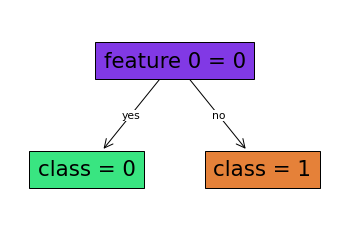

In [6]:
stcl.plot_tree()
plt.show()

### Tree with `depth = 2`

In [7]:
stcl = StrongTreeClassifier(
        depth = 2, 
        time_limit = 60,
        _lambda = 0.51,
        benders_oct= True, 
        num_threads=None, 
        obj_mode = 'acc'
    )
stcl.fit(X, y, verbose = False)


StrongTreeClassifier(_lambda=0.51, depth=2)

In [8]:
predictions = stcl.predict(X)
print(f'In-sample accuracy is {np.sum(predictions==y)/y.shape[0]}')

In-sample accuracy is 0.9230769230769231


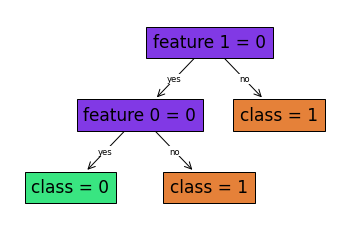

In [9]:
stcl.plot_tree()
plt.show()

### Tree with `depth=2` and positive `_lambda` ([0,0.51])

In [10]:
stcl = StrongTreeClassifier(
        depth = 2, 
        time_limit = 60,
        _lambda = 0.51,
        benders_oct= True, 
        num_threads=None, 
        obj_mode = 'acc'
    )
stcl.fit(X, y, verbose = False)


StrongTreeClassifier(_lambda=0.51, depth=2)

In [11]:
predictions = stcl.predict(X)
print(f'In-sample accuracy is {np.sum(predictions==y)/y.shape[0]}')

In-sample accuracy is 0.9230769230769231


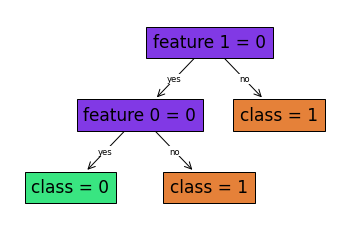

In [12]:
stcl.plot_tree()
plt.show()

## Choice of Objective

For the StrongTree class, we have two options for the objective function. We can either maximize the classification accuracy or the balanced accuracy. 


$$\text{max} \sum_{i \in \mathcal I}\sum_{n \in \mathcal N \cup \mathcal L} z^i_{n,t} \quad \text{(accuracy)}$$

$$\text{max} \frac{1}{|\mathcal K|}\sum_{k \in \mathcal K}\frac{1}{ |\{i \in \mathcal I: y^i=k\}|}\sum_{i \in \mathcal I: y^i=k}\sum_{n \in \mathcal N \cup \mathcal L} z^i_{n,t} \quad \text{(balanced accuracy)}$$

   
The balanced accuracy can be helpful in the case of imbalanced datasets.
    
- A dataset is called imbalanced when the class distribution is not uniform, i.e., when the number of datapoints in each class varies significantly from class to class.
    
- In imbalanced datasets, predicting the majority class for all datapoints results in high accuracy, and thus decision trees that maximize prediction accuracy without accounting for the imbalanced nature of the data perform poorly on the minority class.

- Imbalanced datasets occur in many important domains, e.g., the suicide prevention problem!

## Toy Example 2: different objective functions

In [13]:
'''
    X2
    |               | 
    |               |
    1    + - -      |    -
    |               |   
    |---------------|--------------
    |               |
    0    - - - +    |    - - -
    |    - - - -    |
    |______0________|_______1_______X1
'''
X = np.array([[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],
              [1,0],[1,0],[1,0],
              [1,1],
              [0,1],[0,1],[0,1]])
y = np.array([0,0,0,0,0,0,0,1,
              0,0,0,
              0,
              1,0,0])

### Tree with classification accuracy objective

In [14]:
stcl_acc = StrongTreeClassifier(
        depth = 2, 
        time_limit = 60,
        _lambda = 0,
        benders_oct= False, 
        num_threads=None, 
        obj_mode = 'acc'
    )
stcl_acc.fit(X, y)


StrongTreeClassifier(benders_oct=False, depth=2)

In [15]:
stcl_acc.print_tree()

#########node  1
leaf 0
#########node  2
pruned
#########node  3
pruned
#########node  4
pruned
#########node  5
pruned
#########node  6
pruned
#########node  7
pruned


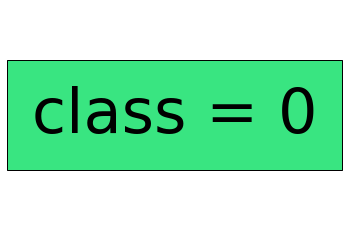

In [16]:
stcl_acc.plot_tree()

### Tree with balanced classification accuracy objective

In [17]:
stcl_balance = StrongTreeClassifier(
        depth = 2, 
        time_limit = 60,
        _lambda = 0,
        benders_oct= False, 
        num_threads=None, 
        obj_mode = 'balance'
    )
stcl_balance.fit(X, y)


StrongTreeClassifier(benders_oct=False, depth=2, obj_mode='balance')

In [18]:
stcl_balance.print_tree()

#########node  1
branch on 1
#########node  2
branch on 1
#########node  3
branch on 0
#########node  4
leaf 0
#########node  5
leaf 0
#########node  6
leaf 1
#########node  7
leaf 0


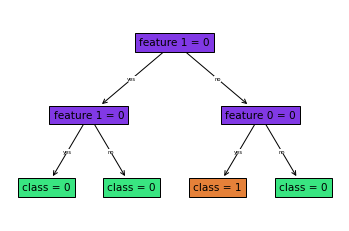

In [19]:
stcl_balance.plot_tree()

## References
Aghaei, S., Gómez, A., & Vayanos, P. (2021). Strong optimal classification trees. arXiv preprint arXiv:2103.15965. [[arxiv](https://arxiv.org/abs/2103.15965)]